Impoerting Libraries

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler

1- Import Data

In [25]:
# Load the CSV file
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv", sep=",")

# Display the first few rows of the DataFrame to ensure it's loaded correctly
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


2- Start Exploratory Data Analysis (EDA)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [27]:
# In this exercise we dont need to drop duplicates since data can seem duplicate but can be two individuals
#df = df.drop_duplicates().reset_index(drop = True)
#df.head()

In [28]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

*Define Categorical and Numerical Variables & One-Hot Code

In [39]:
# List of categorical columns to one-hot encode
categorical_columns = ["sex", "smoker", "region"]

# One-hot encode the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# List of numerical columns (after encoding)
num_variables = df_encoded.columns  # After encoding, all columns are included


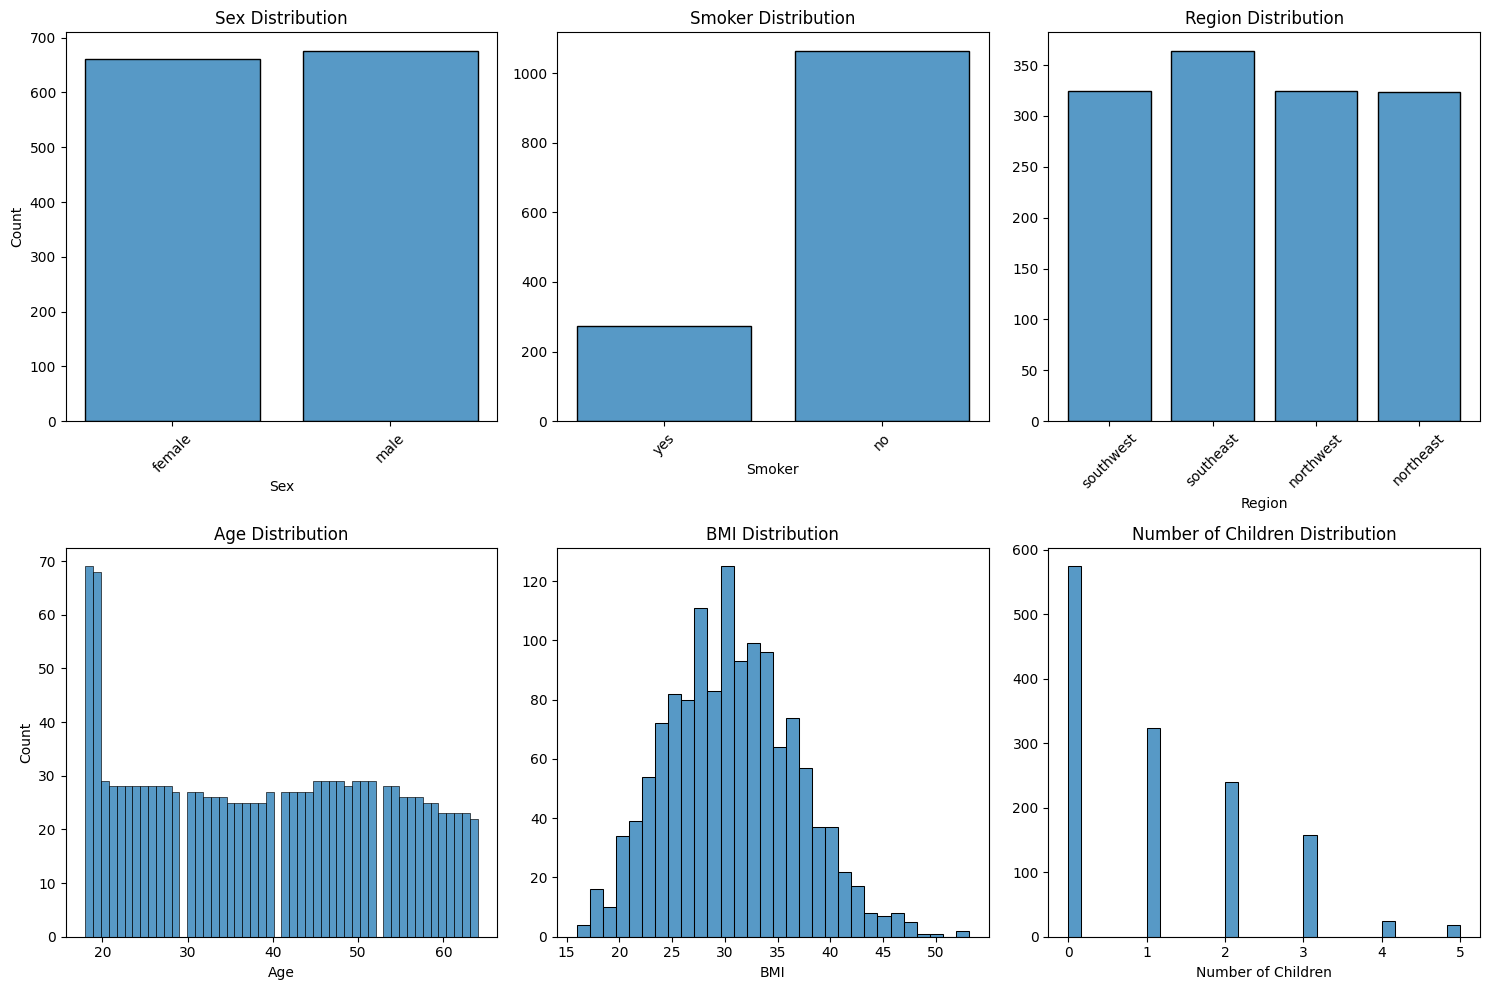

In [40]:
fig, axis = plt.subplots(2, 3, figsize=(15, 10))  # Increase figure size for better readability

# Histogram for 'sex' (categorical data)
sns.histplot(ax=axis[0, 0], data=df, x="sex", discrete=True, shrink=0.8)
axis[0, 0].set_title("Sex Distribution")
axis[0, 0].set_xlabel("Sex")
axis[0, 0].set_ylabel("Count")
axis[0, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

# Histogram for 'smoker' (categorical data)
sns.histplot(ax=axis[0, 1], data=df, x="smoker", discrete=True, shrink=0.8)
axis[0, 1].set_title("Smoker Distribution")
axis[0, 1].set_xlabel("Smoker")
axis[0, 1].set_ylabel(None)  # Remove y-label to reduce clutter
axis[0, 1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

# Histogram for 'region' (categorical data)
sns.histplot(ax=axis[0, 2], data=df, x="region", discrete=True, shrink=0.8)
axis[0, 2].set_title("Region Distribution")
axis[0, 2].set_xlabel("Region")
axis[0, 2].set_ylabel(None)  # Remove y-label to reduce clutter
axis[0, 2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

# Histogram for 'age' (numerical feature)
sns.histplot(ax=axis[1, 0], data=df, x="age", bins=50, kde=False)
axis[1, 0].set_title("Age Distribution")
axis[1, 0].set_xlabel("Age")
axis[1, 0].set_ylabel("Count")

# Histogram for 'bmi' (numerical feature)
sns.histplot(ax=axis[1, 1], data=df, x="bmi", bins=30, kde=False)
axis[1, 1].set_title("BMI Distribution")
axis[1, 1].set_xlabel("BMI")
axis[1, 1].set_ylabel(None)  # Remove y-label to reduce clutter

# Histogram for 'children' (numerical feature)
sns.histplot(ax=axis[1, 2], data=df, x="children", bins=30, kde=False)
axis[1, 2].set_title("Number of Children Distribution")
axis[1, 2].set_xlabel("Number of Children")
axis[1, 2].set_ylabel(None)  # Remove y-label to reduce clutter

# Adjust the layout to reduce overlap and improve spacing
plt.tight_layout()

# Show the plot
plt.show()

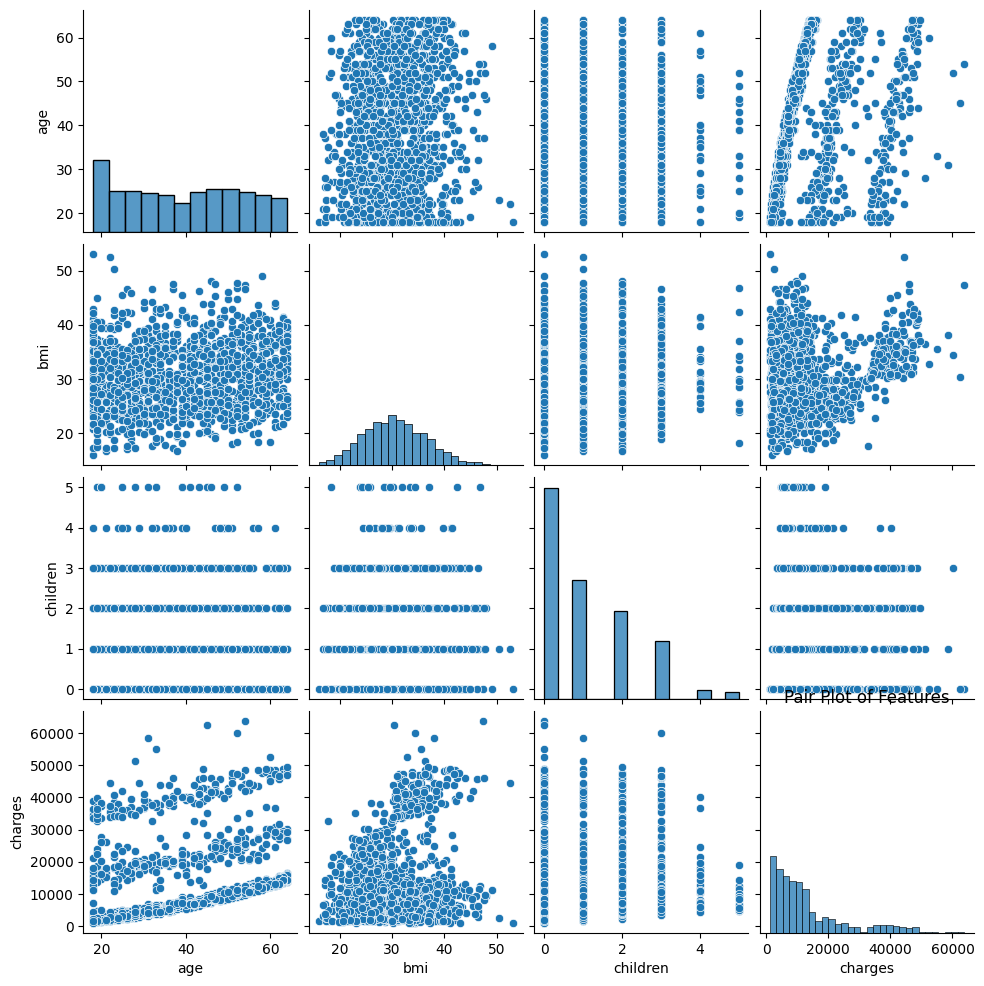

In [31]:
sns.pairplot(df)
plt.title('Pair Plot of Features')
plt.show()

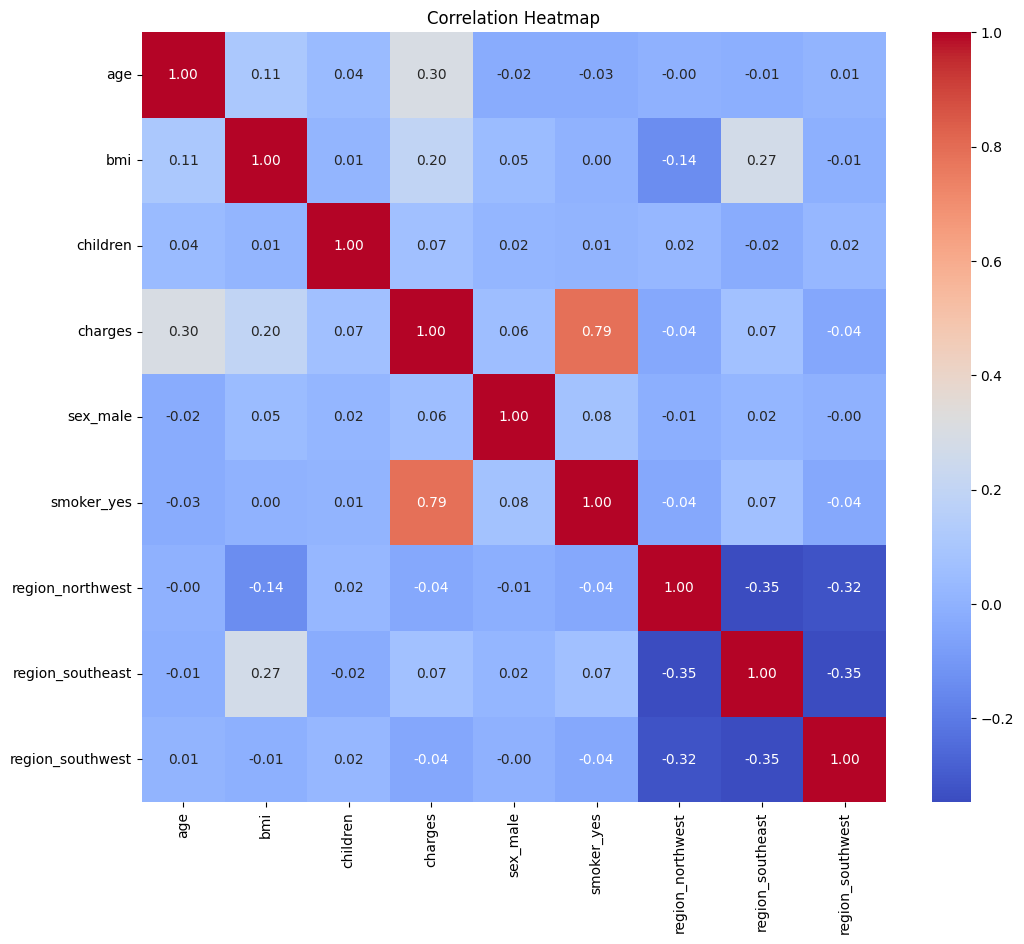

In [32]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

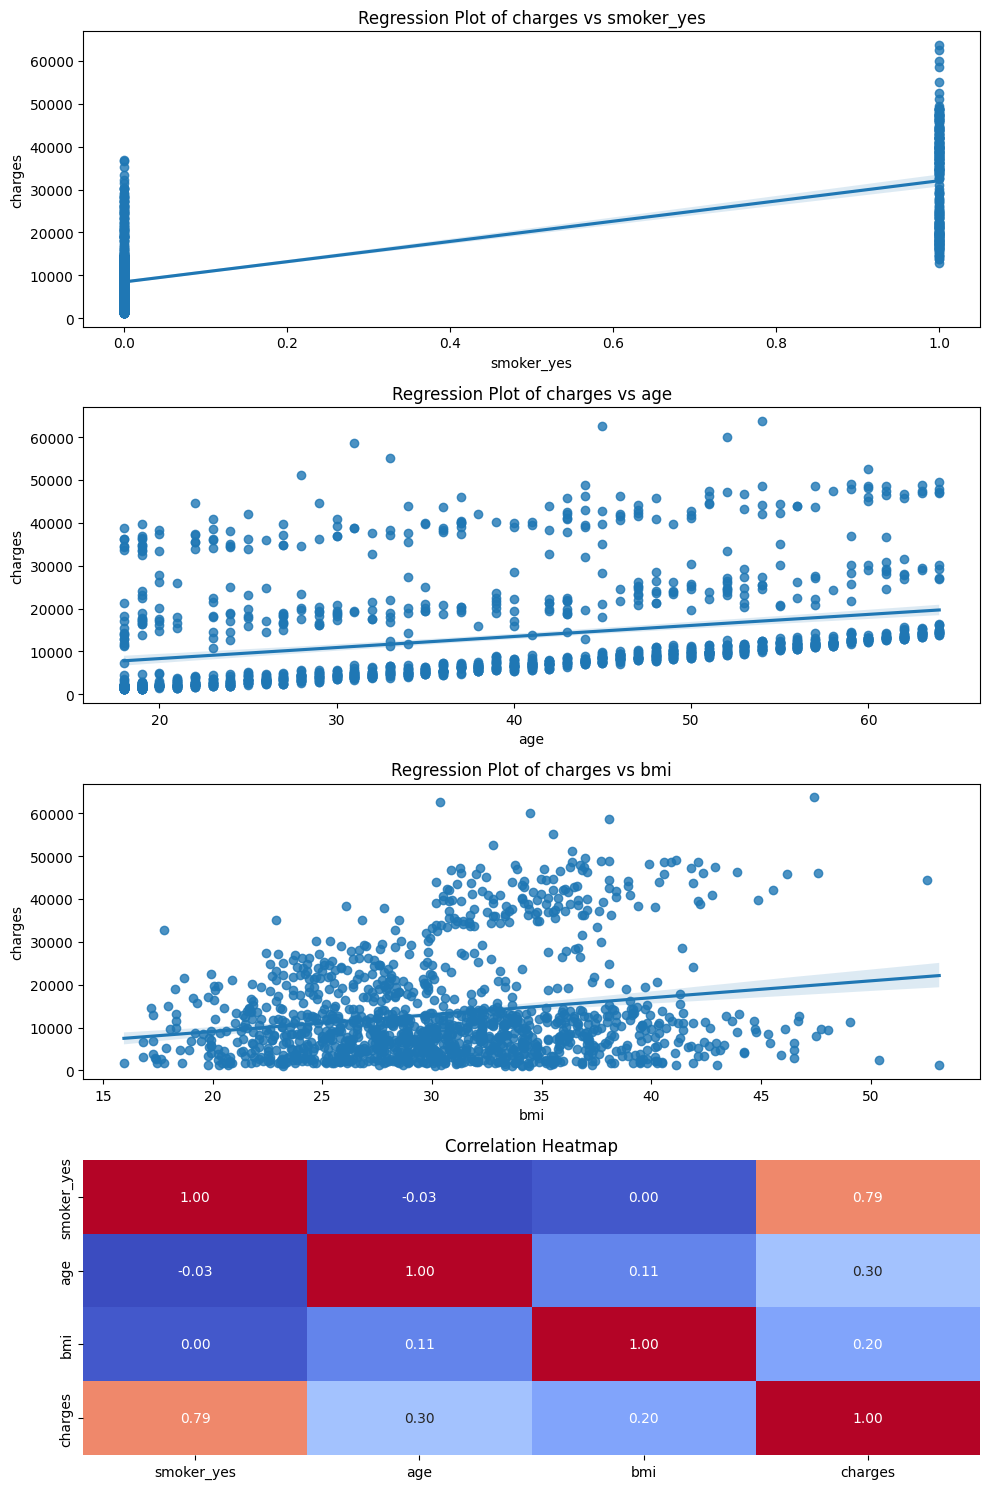

In [41]:
x_columns = ["smoker_yes", "age", "bmi"] 
y_column = "charges"                     

total_data = df_encoded.copy()

# Create subplots
fig, axis = plt.subplots(len(x_columns) + 1, 1, figsize=(10, 15))  # Create more space for multiple plots

# Plot regression plots for each x_column
for i, x_column in enumerate(x_columns):
    sns.regplot(ax=axis[i], data=total_data, x=x_column, y=y_column)
    axis[i].set_title(f'Regression Plot of {y_column} vs {x_column}')
    axis[i].set_xlabel(x_column)
    axis[i].set_ylabel(y_column)

# Heatmap of correlation matrix for selected columns
selected_columns = x_columns + [y_column]
corr_matrix = total_data[selected_columns].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", ax=axis[len(x_columns)], cbar=False, cmap='coolwarm')
axis[len(x_columns)].set_title('Correlation Heatmap')

# Adjust the layout to reduce overlap and improve spacing
plt.tight_layout()

# Show the plot
plt.show()

In [42]:
# The target variable is: 'charges'
target_column = 'charges'
X = df_encoded.drop(columns=[target_column])
y = df_encoded[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.1, 
                                                    random_state=42)

# Feature selection using SelectKBest with f_regression (for regression tasks)
selection_model = SelectKBest(f_regression, k=5)
selection_model.fit(X_train, y_train)

# Get boolean mask of selected features
support_mask = selection_model.get_support()

# Get the selected column names from the original DataFrame
selected_columns = X_train.columns[support_mask]

# Transform the train and test sets to retain only selected features
X_train = pd.DataFrame(selection_model.transform(X_train), columns=selected_columns, index=X_train.index)
X_test = pd.DataFrame(selection_model.transform(X_test), columns=selected_columns, index=X_test.index)

# Display the first few rows of selected features in the training set
X_train.head()

,age,bmi,children,smoker_yes,region_southeast
196,39.0,32.800,0.0,0.0,0.0
1209,59.0,37.100,1.0,0.0,0.0
353,33.0,35.245,0.0,0.0,0.0
461,42.0,30.000,0.0,1.0,0.0
629,44.0,38.950,0.0,1.0,0.0


In [43]:
X_test.head()

,age,bmi,children,smoker_yes,region_southeast
764,45.0,25.175,2.0,0.0,0.0
887,36.0,30.020,0.0,0.0,0.0
890,64.0,26.885,0.0,1.0,0.0
1293,46.0,25.745,3.0,0.0,0.0
259,19.0,31.920,0.0,1.0,0.0


In [36]:
# Scale the numerical features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_encoded)

# Create DataFrame for scaled features
df_scal = pd.DataFrame(scaled_features, index=df.index, columns=num_variables)

# Display the first few rows of the scaled DataFrame
df_scal.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,0.251611,0.0,1.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.009636,1.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.053115,1.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.333010,1.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.043816,1.0,0.0,1.0,0.0,0.0


In [37]:
print(type(X_train))  # Should be <class 'pandas.core.frame.DataFrame'>
print(type(X_test))   # Should be <class 'pandas.core.frame.DataFrame'>
print(type(y_train))  # Should be <class 'pandas.core.series.Series'>
print(type(y_test))   # Should be <class 'pandas.core.series.Series'>

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [38]:
# Save the features (X_train and X_test) to CSV files
X_train.to_csv("../Data/medical_insurance_cost_train.csv", index=False)
X_test.to_csv("../Data/medical_insurance_cost_test.csv", index=False)

# Save the target variables (y_train and y_test) to CSV files
y_train.to_csv("../Data/medical_insurance_cost_train_target.csv", index=False)
y_test.to_csv("../Data/medical_insurance_cost_test_target.csv", index=False)

Start Training Model